In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw, ImageFont
from IPython import display

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [3]:
mtcnn = MTCNN(keep_all=True, device=device)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [26]:
class Engine:
    def __init__(self, file):
        '''
        Initializing video, frames, stored_faces
        '''
        self.video = mmcv.VideoReader(file)
        self.frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in self.video]
        self.stored_faces = []
        #display.Video('multiple_faces.mp4', width=640)
    def seen(self, new_embedding):
        '''
        Detecting if a face has already been seen by calculating the minimum euclidean distance
        from the vector embedding of the new face with previously seen face embeddings
        '''
        min_dist = 1000
        if len(self.stored_faces) > 0:
            min_face = self.stored_faces[0]
        #print("NUMBER OF STORED FACES EQUALS ", len(stored_faces))
        for i in range(len(self.stored_faces)):
            face = self.stored_faces[i]
            p2 = torch.nn.PairwiseDistance(p=2)
            d = p2(face, new_embedding)
            dist = d.item()
            if dist < min_dist:
                min_dist = dist
                min_face = face
            min_dist = min(dist, min_dist)
        #print("DIST IS", min_dist)
        if min_dist < 1.4:
            return min_face
        return None
    def tokenization(self):
        '''
        Performing the face tracking and tokenization of the video using the MTCNN module 
        to track different faces across frames and the ResNet model to find the vector 
        embeddings of each face to perform tokenization via examining the Euclidean distance 
        between the embedding with previously stored faces
        '''
        self.frames_tracked = []
        all_embeddings = []
        embedding_to_face = {}
        frame_to_embedding = {}
        #stored_faces = []
        self.unique_faces = []
        self.timestamps = []
        counter = 0
        for i, frame in enumerate(self.frames):
            print('\rTracking frame: {} '.format(i + 1), end='')
            print("FACE NUMBER IS ", counter)
            # Detect faces
            boxes, _ = mtcnn.detect(frame)
            frame_cropped = mtcnn(frame)
            #print(frame_cropped.size())
            if boxes is not None:
                img_embeddings = resnet(torch.tensor(frame_cropped))
                img_embeddings.unsqueeze(0)
                print(img_embeddings.size())
                for j in range(img_embeddings.size(dim=0)):
                    img_embedding = img_embeddings[j]
                    #print(img_embedding.size())
                    #print(seen(img_embedding))
                    face = self.seen(img_embedding)
                    if len(all_embeddings) == 0 or face is None:
                        print("NEW FACE")
                        self.unique_faces.append(frame_cropped)
                        self.timestamps.append(i+1)
                        self.stored_faces.append(img_embedding)
                        embedding_to_face[img_embedding] = counter
                        counter += 1
                    else:
                        print("ALREADY SEEN")
                        #face = seen(img_embedding)
                        embedding_to_face[img_embedding] = embedding_to_face[face]
                    all_embeddings.append(img_embedding)
                    #frame_to_embedding[i] = img_embedding
            frame_draw = frame.copy()
            draw = ImageDraw.Draw(frame_draw)
            if boxes is not None:
                for box in boxes:
                    b = box.tolist() #[x0, y0, x1, y1]
                    draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
                    font = ImageFont.truetype("Gidole-Regular.ttf", size=52)
                    draw.text((b[2], b[3]-15), "Person #" + str(counter), fill = "red", font=font)
            # Add to frame list
            self.frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
        print('\nDone')
    def display(self):
        '''
        Displays the results of face tracking and tokenization
        '''
        d = display.display(self.frames_tracked[0], display_id=True)
        i = 1
        for i in range(len(self.frames_tracked)-1):
            d.update(self.frames_tracked[i+1])
            i += 1
    def output_metadata(self):
        '''
        Outputs the unique faces and frame number where each face appears
        '''
        print(self.unique_faces, self.timestamps)

In [27]:
engine_inst = Engine('test_vid.mp4')
engine_inst.tokenization()

Tracking frame: 1 FACE NUMBER IS  0


/var/folders/c8/sb_pbvld6p3dlwfkw274vqtw0000gn/T/ipykernel_80319/2162892652.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_embeddings = resnet(torch.tensor(frame_cropped))


torch.Size([1, 512])
NEW FACE
Tracking frame: 2 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 3 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 4 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 5 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 6 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 7 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 8 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 9 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 10 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 11 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 12 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 13 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 14 FACE NUMBER IS  1
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 15 FACE NUMBER IS  1
torch.Size([1, 512

torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 117 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 118 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 119 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 120 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 121 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 122 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 123 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 124 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 125 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 126 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 127 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 128 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 129 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 130 FACE NUMBE

torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 231 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 232 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 233 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 234 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 235 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 236 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 237 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 238 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 239 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 240 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 241 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 242 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 243 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 244 FACE NUMBE

torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 345 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 346 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 347 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 348 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 349 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 350 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 351 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 352 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 353 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 354 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 355 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 356 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 357 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 358 FACE NUMBE

torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 459 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 460 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 461 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 462 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 463 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 464 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 465 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 466 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 467 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 468 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 469 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 470 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 471 FACE NUMBER IS  2
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 472 FACE NUMBE

torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 552 FACE NUMBER IS  4
torch.Size([2, 512])
ALREADY SEEN
ALREADY SEEN
Tracking frame: 553 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 554 FACE NUMBER IS  4
torch.Size([2, 512])
ALREADY SEEN
ALREADY SEEN
Tracking frame: 555 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 556 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 557 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 558 FACE NUMBER IS  4
torch.Size([3, 512])
ALREADY SEEN
ALREADY SEEN
ALREADY SEEN
Tracking frame: 559 FACE NUMBER IS  4
torch.Size([2, 512])
ALREADY SEEN
ALREADY SEEN
Tracking frame: 560 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 561 FACE NUMBER IS  4
torch.Size([2, 512])
ALREADY SEEN
ALREADY SEEN
Tracking frame: 562 FACE NUMBER IS  4
torch.Size([2, 512])
ALREADY SEEN
ALREADY SEEN
Tracking frame: 563 FACE NUMBER IS  4
torch.Size([2, 512])
ALREADY SEEN
ALREADY SEE

torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 657 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 658 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 659 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 660 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 661 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 662 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 663 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 664 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 665 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 666 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 667 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 668 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 669 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 670 FACE NUMBE

torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 766 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 767 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 768 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 769 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 770 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 771 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 772 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 773 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 774 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 775 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 776 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 777 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 778 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 779 FACE NUMBE

torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 877 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 878 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 879 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 880 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 881 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 882 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 883 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 884 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 885 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 886 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 887 FACE NUMBER IS  4
torch.Size([2, 512])
ALREADY SEEN
ALREADY SEEN
Tracking frame: 888 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 889 FACE NUMBER IS  4
torch.Size([1, 512])
ALREADY SEEN
Tracking frame: 8

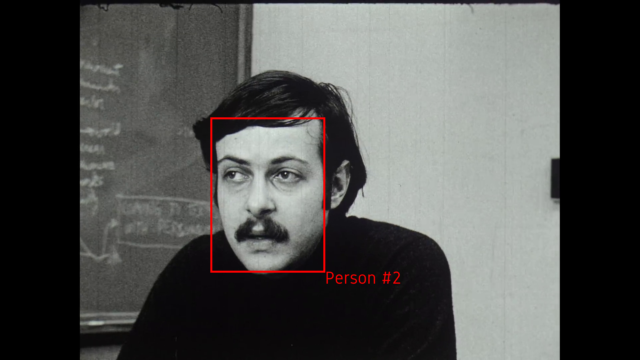

KeyboardInterrupt: 

In [28]:
engine_inst.display()

In [29]:
engine_inst.output_metadata()

[tensor([[[[ 0.3711,  0.3555,  0.3320,  ..., -0.3242, -0.1836, -0.1836],
          [ 0.2305,  0.2227,  0.2148,  ..., -0.2695, -0.2148, -0.1992],
          [-0.0195, -0.0195, -0.0195,  ..., -0.1992, -0.1992, -0.1992],
          ...,
          [-0.8320, -0.8320, -0.8398,  ...,  0.3164,  0.3633,  0.4023],
          [-0.7539, -0.7461, -0.7305,  ...,  0.3242,  0.3789,  0.4180],
          [-0.5352, -0.5117, -0.5039,  ...,  0.3320,  0.3867,  0.4258]],

         [[ 0.4102,  0.3945,  0.3711,  ..., -0.3086, -0.1680, -0.1680],
          [ 0.2695,  0.2617,  0.2539,  ..., -0.2539, -0.1992, -0.1836],
          [ 0.0195,  0.0195,  0.0195,  ..., -0.1836, -0.1836, -0.1836],
          ...,
          [-0.8320, -0.8320, -0.8398,  ...,  0.3555,  0.4023,  0.4414],
          [-0.7539, -0.7461, -0.7305,  ...,  0.3633,  0.4180,  0.4570],
          [-0.5352, -0.5117, -0.5039,  ...,  0.3711,  0.4258,  0.4648]],

         [[ 0.3789,  0.3633,  0.3398,  ..., -0.3398, -0.1992, -0.2070],
          [ 0.2305,  0.2227, 